# 딥러닝을 이용해서 이미지 분류

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import koreanize_matplotlib
import seaborn as sns

In [2]:
# MNIST 손글씨 데이터 불러와 저장하기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

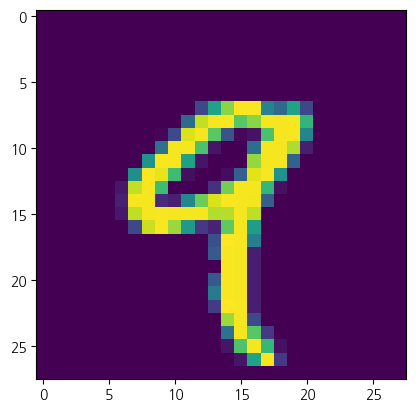

In [5]:
plt.imshow(X_train[4])

In [6]:
# 컴퓨터는 어떻게 이미지를 인식하는가?
for x in X_train[4]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  55 14821025325311387 14855 0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  87 2322522531892102522522531680  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  4  57 24225219065 5  12 1822522531160  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  96 25225218314 0  0  92 25225222521 0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  13225325214614 0  0  0  21525225279 0  0 

In [7]:
# 0-255

In [8]:
X_train.shape[0]

60000

In [9]:
# 차원 변환 과정 보기
X_train = X_train.reshape(X_train.shape[0], 784)

In [10]:
28*28

784

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
# 케라스에서 이미지 분석을 할 때 데이터를 0에서 1사이의 값으로 변환해야 분석이 잘 됨.
# 이미지 분석을 할 때 꼭 해주어야 하는 작업은 255로 나누어 주는 작업이 필수
# 이러한 작업을 데이터 정규화(normalization)이라고 한다.
X_train = X_train.astype('float64')
X_train = X_train / 255


In [14]:
X_test = X_test.reshape(X_test.shape[0], 784)
X_test = X_test.astype('float64')
X_test = X_test / 255

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_train[4]

9

In [17]:
# 타겟이 카테고리형이어야 하기 때문에 숫자로 된 타겟 컬럼을 원핫인코딩 해줌
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

딥러닝을 이용한 mnist 손글씨 분석

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [20]:
X_train.shape[1]

784

In [21]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))  # 2의 배수 
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
pwd

'C:\\bigdata'

In [23]:
# 모델 최적화를 위한 설정 
model_dir = './model/'
if not os.path.exists(model_dir):  # 디렉토리가 없을 때 자동 생성
    os.mkdir(model_dir)
    
modelpath = "./model/MINIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

In [24]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.18908, saving model to ./model\MINIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18908 to 0.13460, saving model to ./model\MINIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13460 to 0.10797, saving model to ./model\MINIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10797 to 0.10431, saving model to ./model\MINIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10431 to 0.09239, saving model to ./model\MINIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09239 to 0.08750, saving model to ./model\MINIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08750 to 0.08500, saving model to ./model\MINIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08500 to 0.08344, saving model to ./model\MINIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08344

Epoch 10: val_loss did not improve from 0.08344

Epoch 11: val_loss improved from 0.08344 to 0.08302, saving model to ./model\MINIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.08302

Epoch 13: val_loss 

In [25]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
X_test.shape

(10000, 784)

In [28]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9811


[0.07312590628862381, 0.9811000227928162]

In [30]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

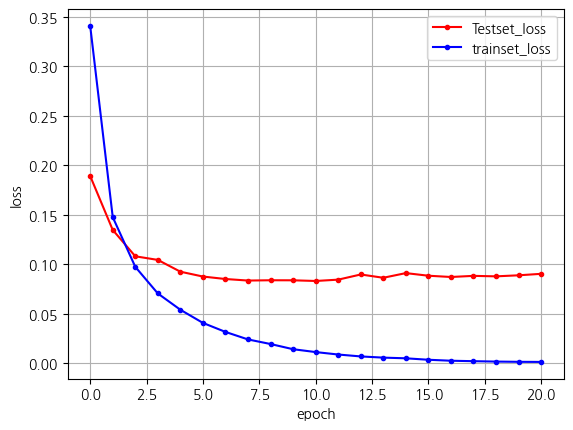

In [31]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 합성곱 신경망(Convolution Neural Network) CNN
* 입력된 이미지에서 다시 한 번 특징을 추출하기 위해서 커널(필터)을 이용하는 방법


In [32]:
# MNIST 손글씨 데이터 불러와 저장하기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [35]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 최적화를 위한 설정 
model_dir = './model/'
if not os.path.exists(model_dir):  # 디렉토리가 없을 때 자동 생성
    os.mkdir(model_dir)
    
modelpath = "./model/MINIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

In [37]:
import tensorflow as tf
# 텐서가 어디에 할당 되어 있는지 확인
print(tf.debugging.set_log_device_placement(True))

None


In [38]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.08109, saving model to ./model\MINIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08109 to 0.05782, saving model to ./model\MINIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05782 to 0.04770, saving model to ./model\MINIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04770 to 0.04618, saving model to ./model\MINIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04618 to 0.04358, saving model to ./model\MINIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04358 to 0.04289, saving model to ./model\MINIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04289 to 0.04246, saving model to ./model\MINIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04246 to 0.04198, saving model to ./model\MINIST_CNN.hdf5

Epoch 9: val_loss improved from 0.04198 to 0.04082, saving model to ./model\MINIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.04082

Epoch 11: val_loss did not improve from 0.04082

Epoch 12: val_loss did not improve from 0.04082

Epoch 13: val_loss 

313/313 [==============================] - 2s 7ms/step - loss: 0.0319 - accuracy: 0.9921


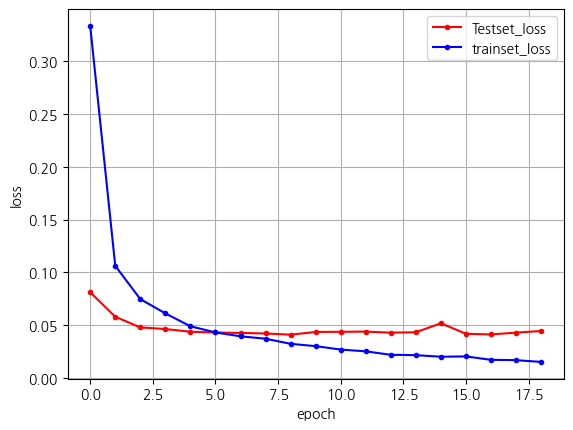

In [39]:
model.evaluate(X_test, y_test)
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()